In [1]:
import os
import re

import pandas as pd
import numpy as np

from matplotlib.cbook import boxplot_stats
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter
import seaborn as sns

import util as util
import metrics as mt
from lamp import Lamp
from itertools import product

from itertools import combinations

# Pegar os dados do melhor modelo

In [2]:
epoch = 30
num_features = 30

In [3]:
explanation_methods = ['Integrated_Gradients',
                       'Input_X_Gradient', 
                       'SmoothGrad',
                       'Vanilla_Gradients', 
                       'Guided_Backprop',
#                        'Occlusion',
#                        'Lime', 
#                        'KernelShap',
                       'DeepLift',
#                        'ShapleyValueSampling',
          ]

In [4]:
list_combinations_methods = ["('DeepLift', 'Guided_Backprop')",
 "('DeepLift', 'Input_X_Gradient')",
 "('DeepLift', 'Integrated_Gradients')",
 "('DeepLift', 'SmoothGrad')",
 "('DeepLift', 'Vanilla_Gradients')",
 "('Guided_Backprop', 'Input_X_Gradient')",
 "('Guided_Backprop', 'Integrated_Gradients')",
 "('Guided_Backprop', 'SmoothGrad')",
 "('Guided_Backprop', 'Vanilla_Gradients')",
 "('Input_X_Gradient', 'Integrated_Gradients')",
 "('Input_X_Gradient', 'SmoothGrad')",
 "('Input_X_Gradient', 'Vanilla_Gradients')",
 "('Integrated_Gradients', 'SmoothGrad')",
 "('Integrated_Gradients', 'Vanilla_Gradients')",
 "('SmoothGrad', 'Vanilla_Gradients')"]

In [5]:
df_geral = pd.read_csv('./data/wdbc/NN/experiment_B/agreement_level_local.csv')
df_geral

,"('DeepLift', 'Guided_Backprop')","('DeepLift', 'Input_X_Gradient')","('DeepLift', 'Integrated_Gradients')","('DeepLift', 'KernelShap')","('DeepLift', 'Lime')","('DeepLift', 'Occlusion')","('DeepLift', 'SmoothGrad')","('DeepLift', 'Vanilla_Gradients')","('Guided_Backprop', 'Input_X_Gradient')","('Guided_Backprop', 'Integrated_Gradients')",...,"('Lime', 'Occlusion')","('Lime', 'SmoothGrad')","('Lime', 'Vanilla_Gradients')","('Occlusion', 'SmoothGrad')","('Occlusion', 'Vanilla_Gradients')","('SmoothGrad', 'Vanilla_Gradients')",average,metric,k,instance
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.0,1.0,0.000000,0.000000,1.000000,0.250000,feature agreement,1,0.0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.083333,feature agreement,1,1.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.111111,feature agreement,1,2.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.111111,feature agreement,1,3.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.0,1.0,1.000000,1.000000,1.000000,0.416667,feature agreement,1,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10315,0.000000,0.000000,0.033333,0.033333,0.000000,0.033333,0.000000,0.000000,0.033333,0.033333,...,0.066667,0.0,0.0,0.033333,0.033333,0.233333,0.053704,signed rank agreement,30,81.0
10316,0.033333,0.033333,0.000000,0.000000,0.000000,0.000000,0.033333,0.033333,0.033333,0.100000,...,0.000000,0.0,0.0,0.033333,0.033333,1.000000,0.136111,signed rank agreement,30,82.0
10317,0.000000,0.066667,0.033333,0.000000,0.000000,0.066667,0.000000,0.033333,0.033333,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.500000,0.062037,signed rank agreement,30,83.0
10318,0.033333,0.033333,0.066667,0.066667,0.033333,0.033333,0.033333,0.033333,0.066667,0.033333,...,0.033333,0.0,0.0,0.066667,0.033333,0.466667,0.059259,signed rank agreement,30,84.0


In [6]:
[*df_geral.k.value_counts().index]

[1,
 2,
 29,
 28,
 27,
 26,
 25,
 24,
 23,
 22,
 21,
 20,
 19,
 18,
 17,
 16,
 15,
 14,
 13,
 12,
 11,
 10,
 9,
 8,
 7,
 6,
 5,
 4,
 3,
 30]

In [7]:
list_metrics = {
    "feature agreement": mt.feature_agreement,
    "rank agreement": mt.rank_agreement,
    "sign agreement": mt.sign_agreement,
    "signed rank agreement": mt.sign_rank_agreement,
}

In [8]:
df_geral[list_combinations_methods]

,"('DeepLift', 'Guided_Backprop')","('DeepLift', 'Input_X_Gradient')","('DeepLift', 'Integrated_Gradients')","('DeepLift', 'SmoothGrad')","('DeepLift', 'Vanilla_Gradients')","('Guided_Backprop', 'Input_X_Gradient')","('Guided_Backprop', 'Integrated_Gradients')","('Guided_Backprop', 'SmoothGrad')","('Guided_Backprop', 'Vanilla_Gradients')","('Input_X_Gradient', 'Integrated_Gradients')","('Input_X_Gradient', 'SmoothGrad')","('Input_X_Gradient', 'Vanilla_Gradients')","('Integrated_Gradients', 'SmoothGrad')","('Integrated_Gradients', 'Vanilla_Gradients')","('SmoothGrad', 'Vanilla_Gradients')"
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.0,1.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10315,0.000000,0.000000,0.033333,0.000000,0.000000,0.033333,0.033333,0.033333,0.000000,0.200000,0.000000,0.000000,0.0,0.0,0.233333
10316,0.033333,0.033333,0.000000,0.033333,0.033333,0.033333,0.100000,1.000000,1.000000,0.200000,0.033333,0.033333,0.1,0.1,1.000000
10317,0.000000,0.066667,0.033333,0.000000,0.033333,0.033333,0.000000,0.033333,0.000000,0.133333,0.000000,0.000000,0.0,0.0,0.500000
10318,0.033333,0.033333,0.066667,0.033333,0.033333,0.066667,0.033333,0.000000,0.033333,0.233333,0.000000,0.000000,0.0,0.0,0.466667


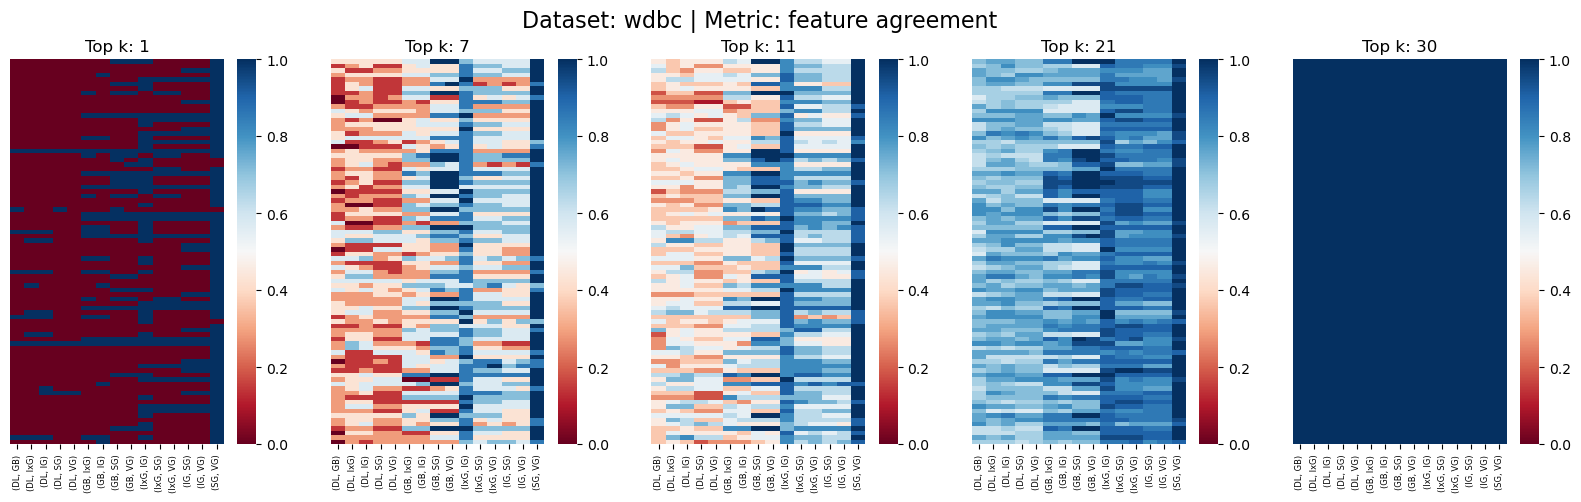

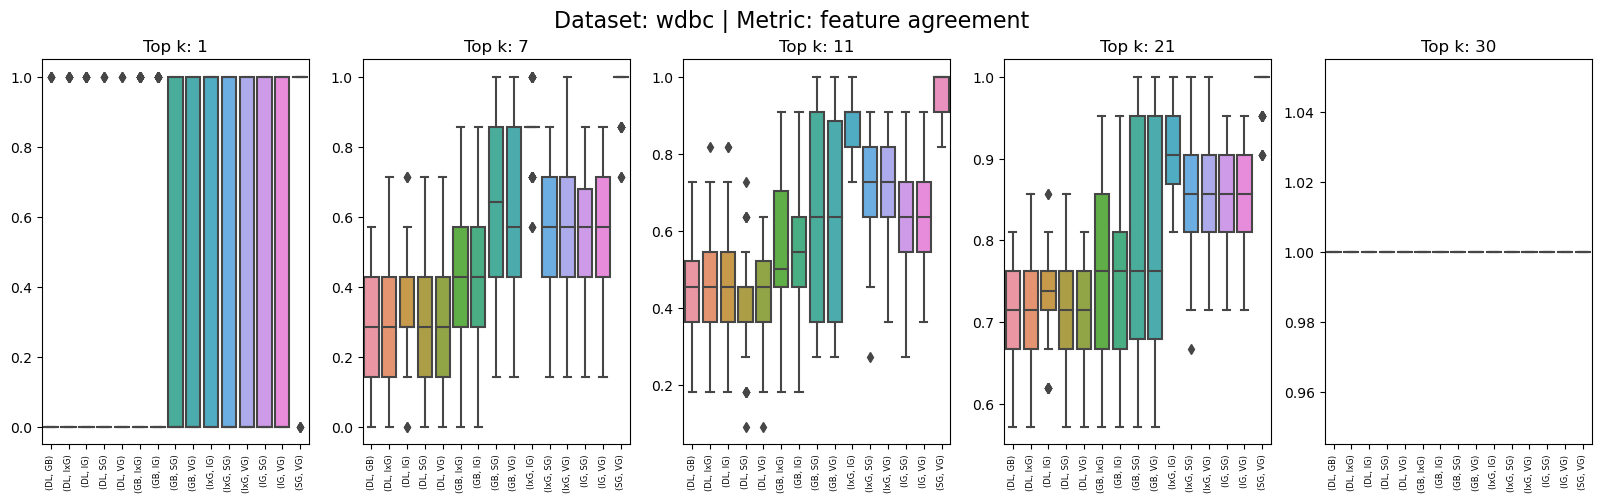

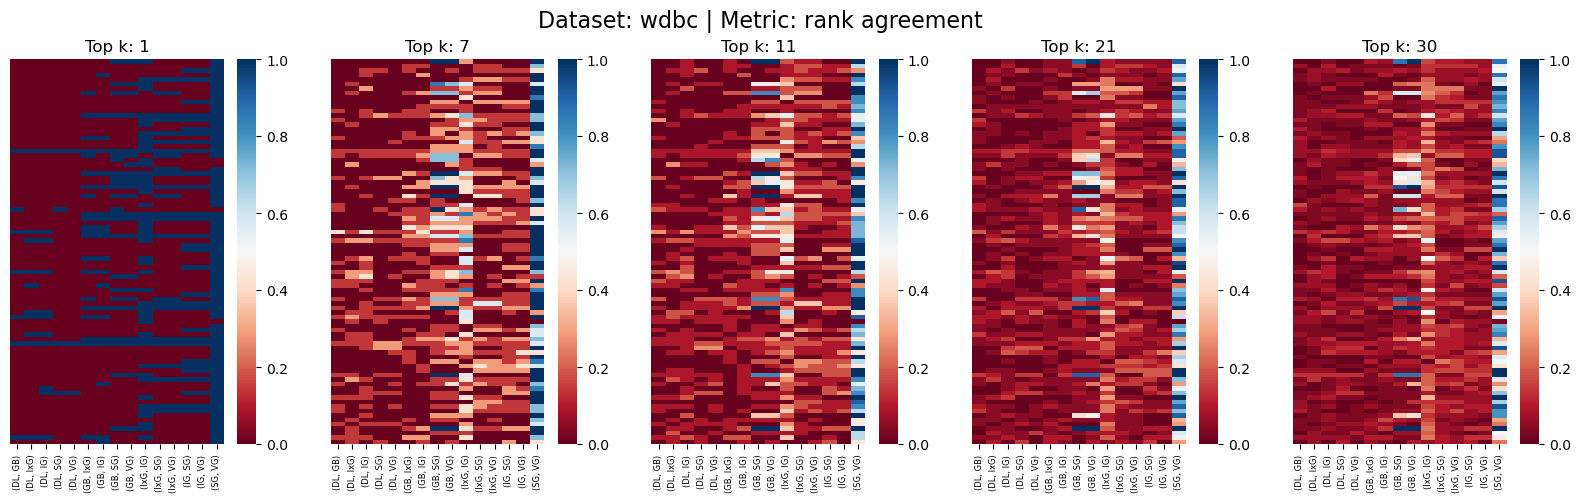

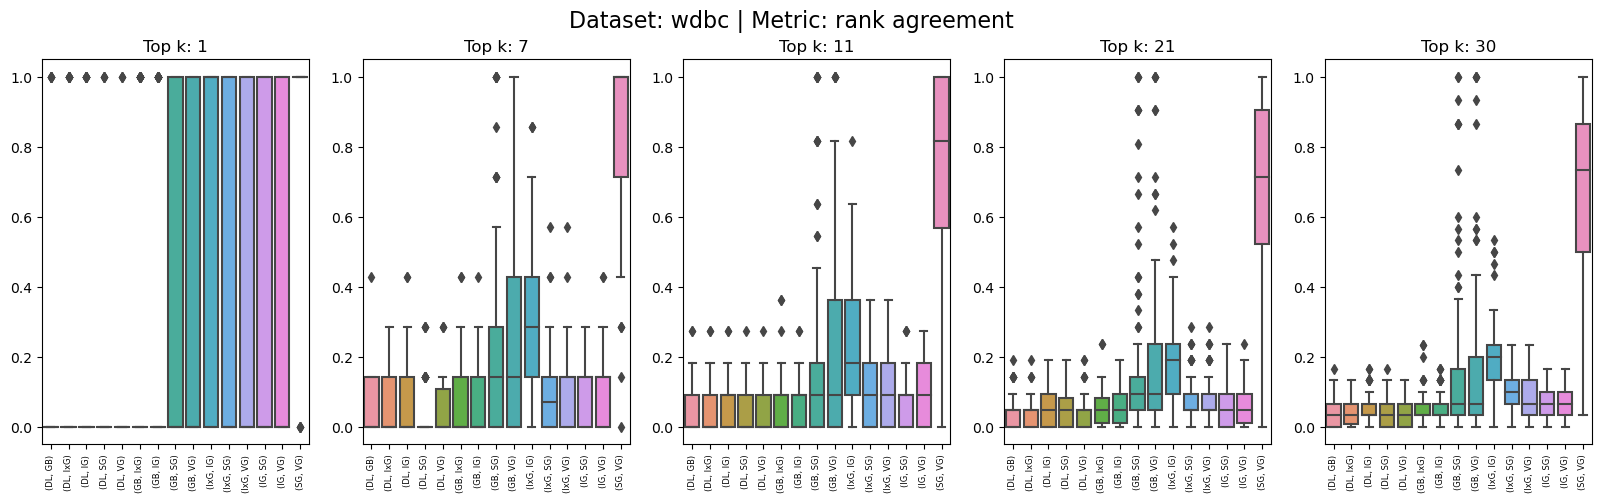

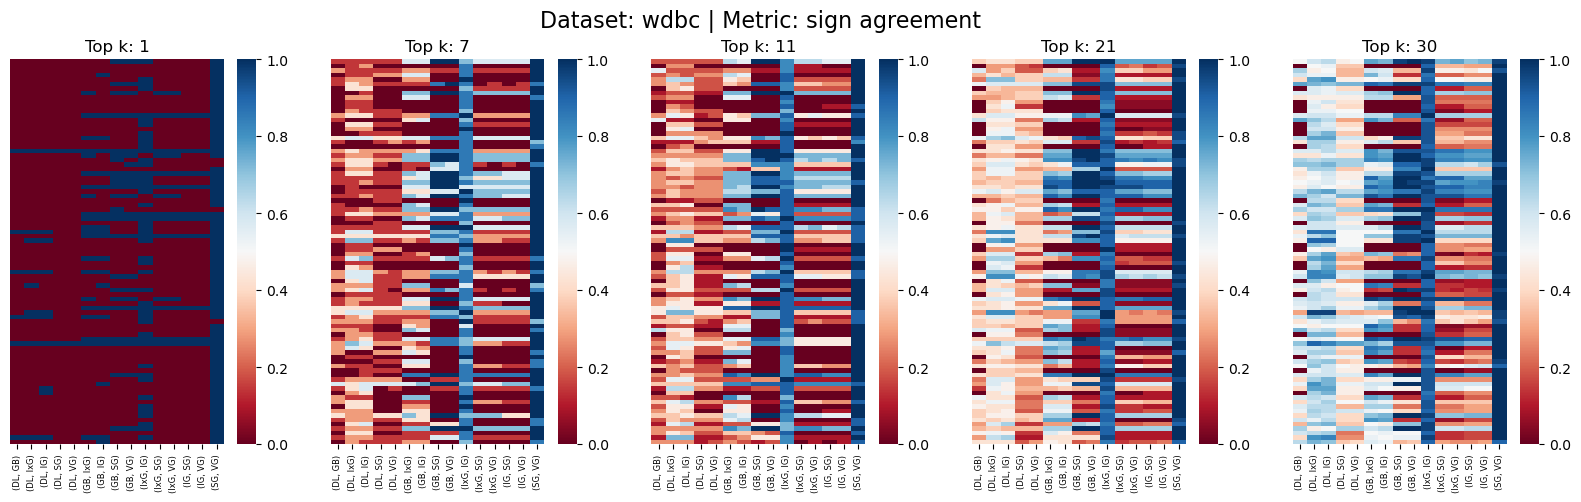

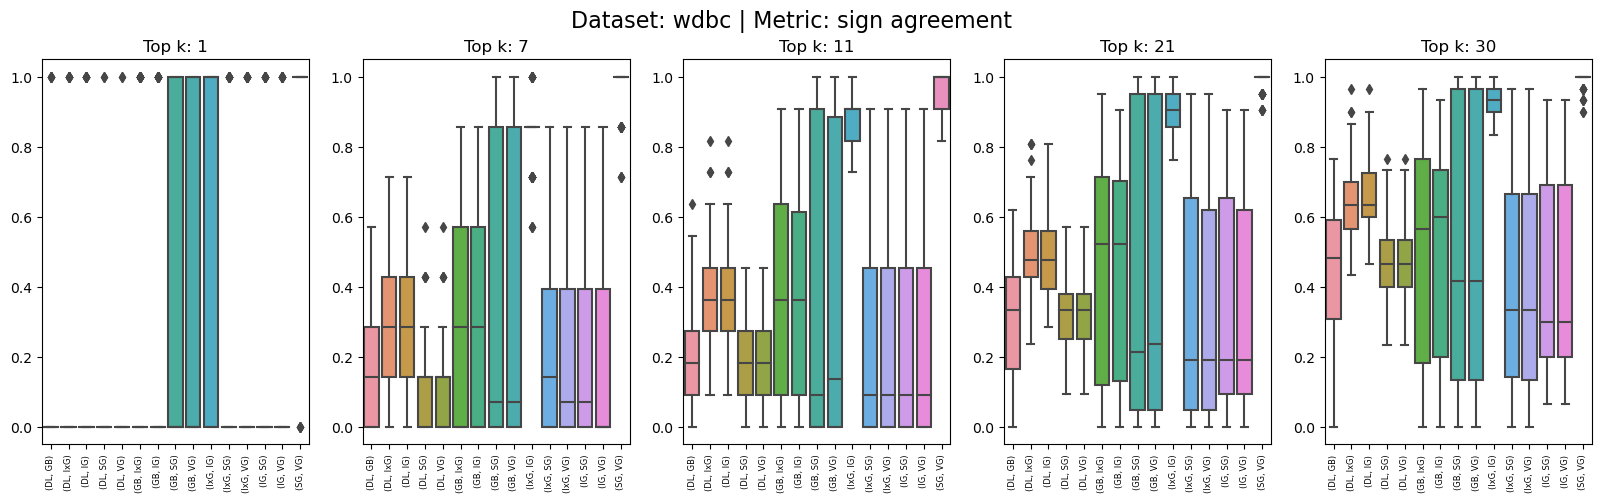

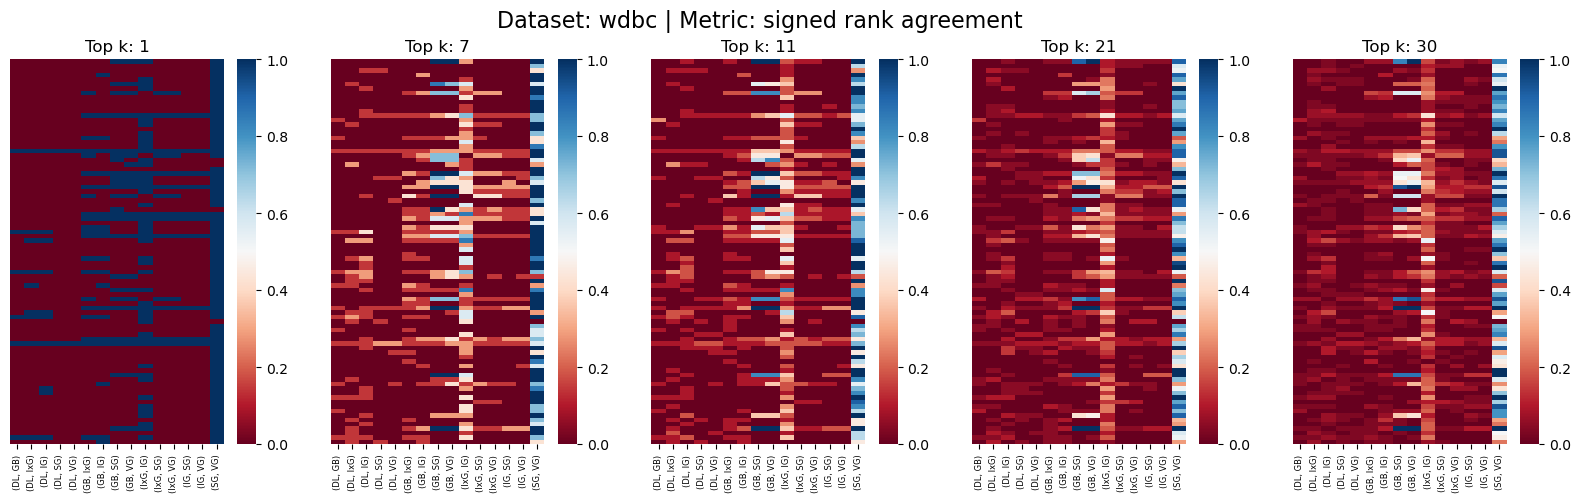

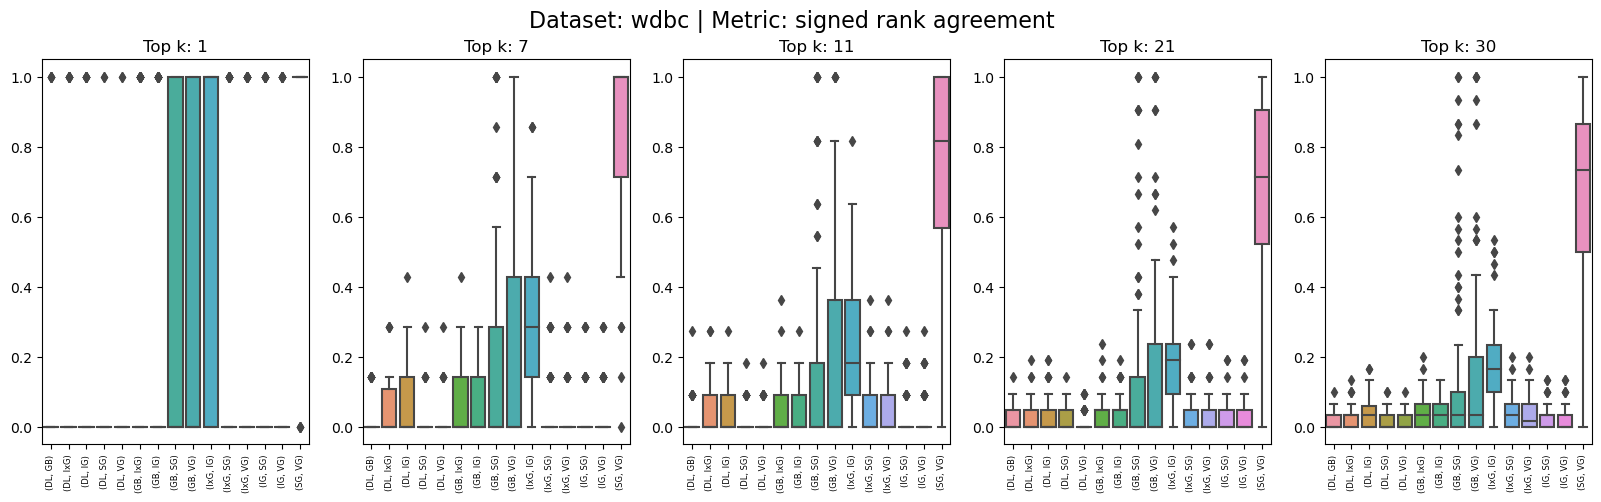

In [9]:
selected_methods = explanation_methods

dfs = {}

for metric_name, selected_metric in list_metrics.items():
    fig, axs = plt.subplots(1, 5, figsize=(20, 5))
    fig_boxplot, axs_boxplot = plt.subplots(1, 5, figsize=(20, 5))
    
    i = 0
    df_k = {}
    for selected_k in [1,7,11,21,30]:
        xticklabels = ['(DL, GB)', '(DL, IxG)', '(DL, IG)', '(DL, SG)', '(DL, VG)',
       '(GB, IxG)', '(GB, IG)', '(GB, SG)', '(GB, VG)', '(IxG, IG)',
       '(IxG, SG)', '(IxG, VG)', '(IG, SG)', '(IG, VG)', '(SG, VG)']
        
        df = df_geral[(df_geral['metric'] == metric_name) & (df_geral['k'] == selected_k)]
        df = df[list_combinations_methods]
        
        df_k[selected_k] = df
        
        sns.heatmap(df, cmap='RdBu', ax=axs[i], vmax=1, vmin=0, xticklabels=xticklabels)
        axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation = 90, fontsize = 6)
        axs[i].get_yaxis().set_visible(False)
        axs[i].set_title('Top k: ' + str(selected_k))        
        
        sns.boxplot(data=df, ax=axs_boxplot[i])
        axs_boxplot[i].set_title('Top k: ' + str(selected_k))      
        axs_boxplot[i].set_xticklabels(xticklabels, rotation = 90, fontsize = 6)
        
        i+=1
    
    dfs[metric_name] = df_k
    
    fig.suptitle('Dataset: wdbc | Metric: ' + metric_name, fontsize=16)
    fig.savefig('./data/wdbc/NN/experiment_C/gradient_based/heatmaps/' + metric_name +'_heatmap_gb_.png', dpi=300)    
    
    fig_boxplot.suptitle('Dataset: wdbc | Metric: ' + metric_name, fontsize=16)
    fig_boxplot.savefig('./data/wdbc/NN/experiment_C/gradient_based/boxplots/' + metric_name +'_boxplot_gb_.png', dpi=300)

# Permu

In [10]:
explanation_methods = [
                       'Occlusion',
                       'Lime', 
                       'KernelShap'
          ]

In [11]:
list_combinations_methods = [
 "('KernelShap', 'Lime')",
 "('KernelShap', 'Occlusion')",
 "('Lime', 'Occlusion')",
                            ]

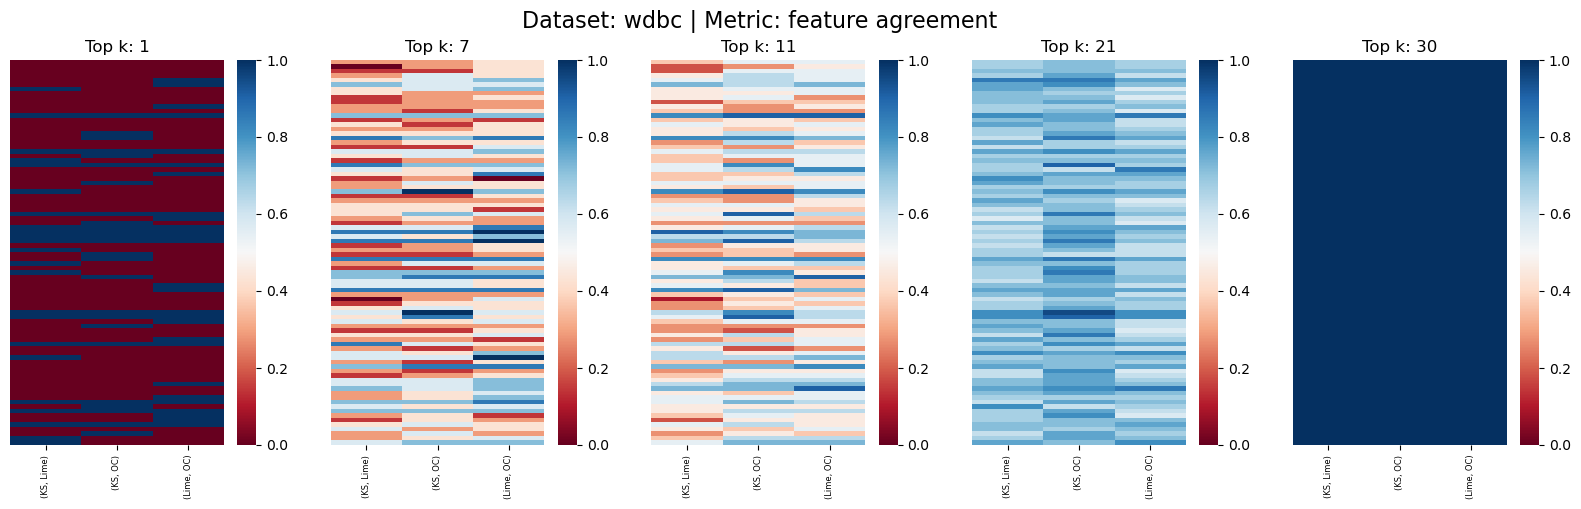

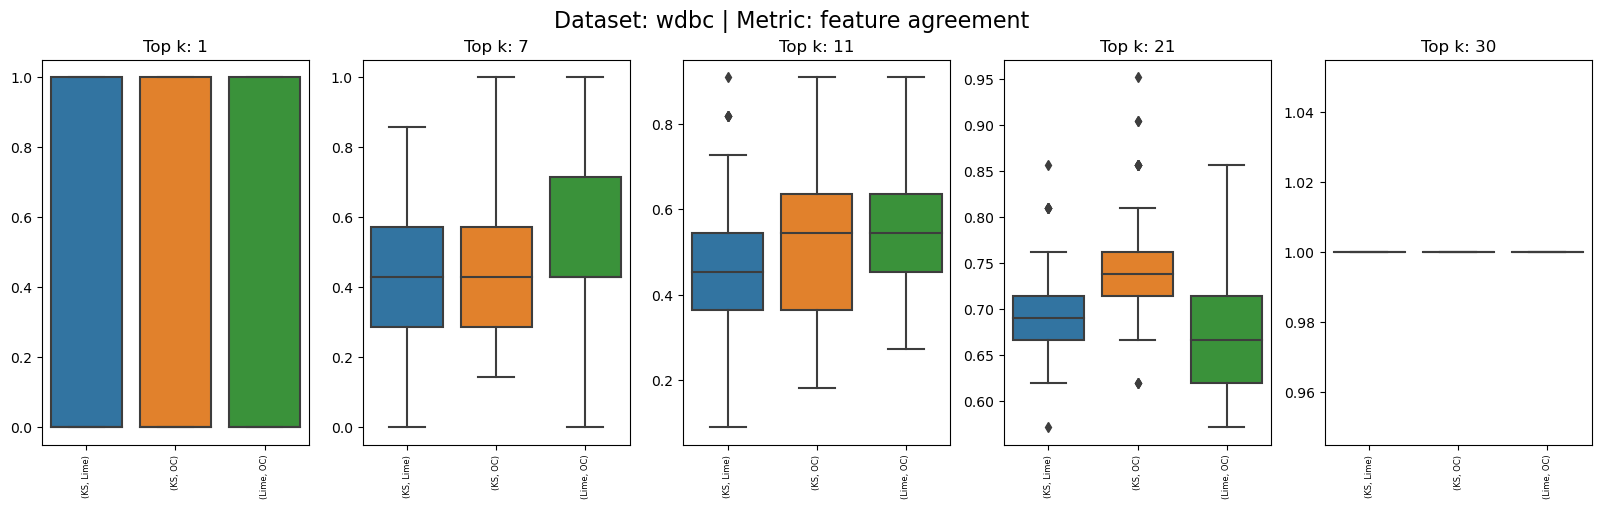

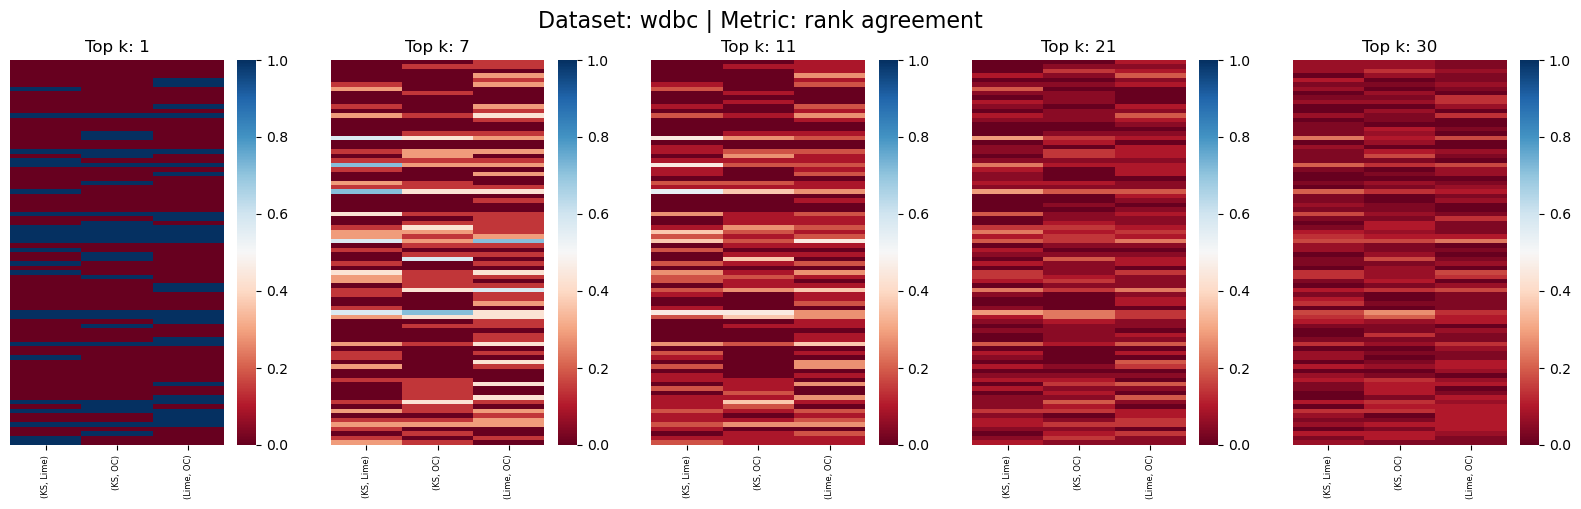

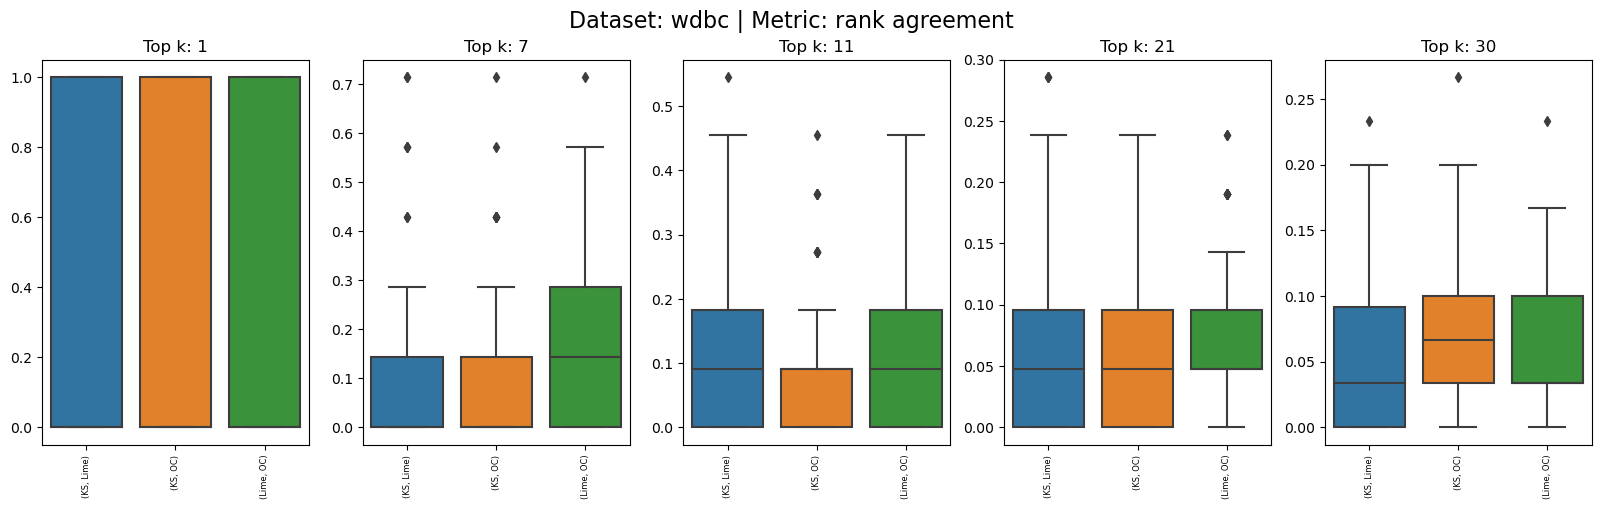

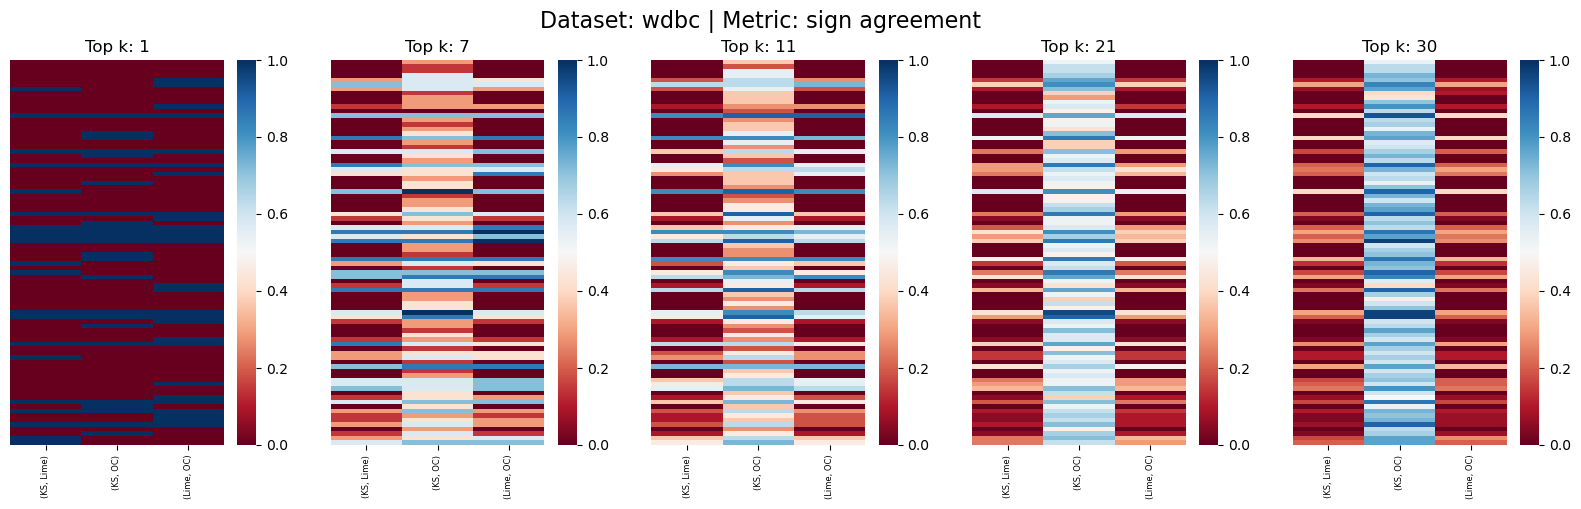

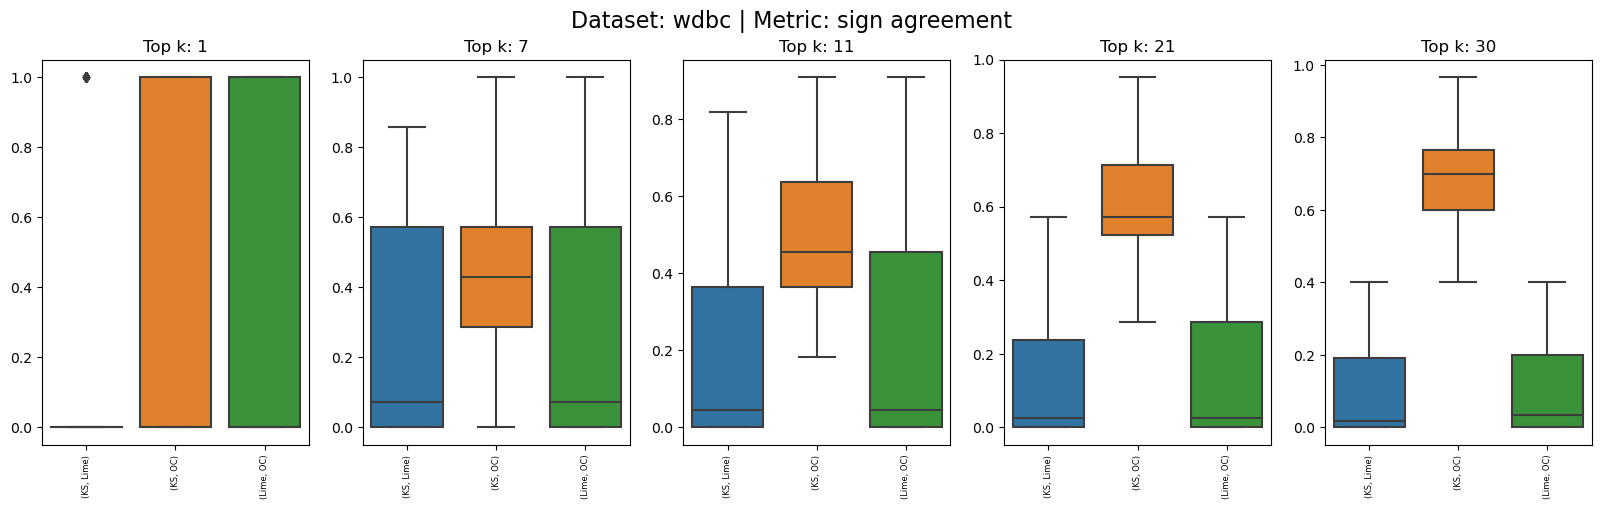

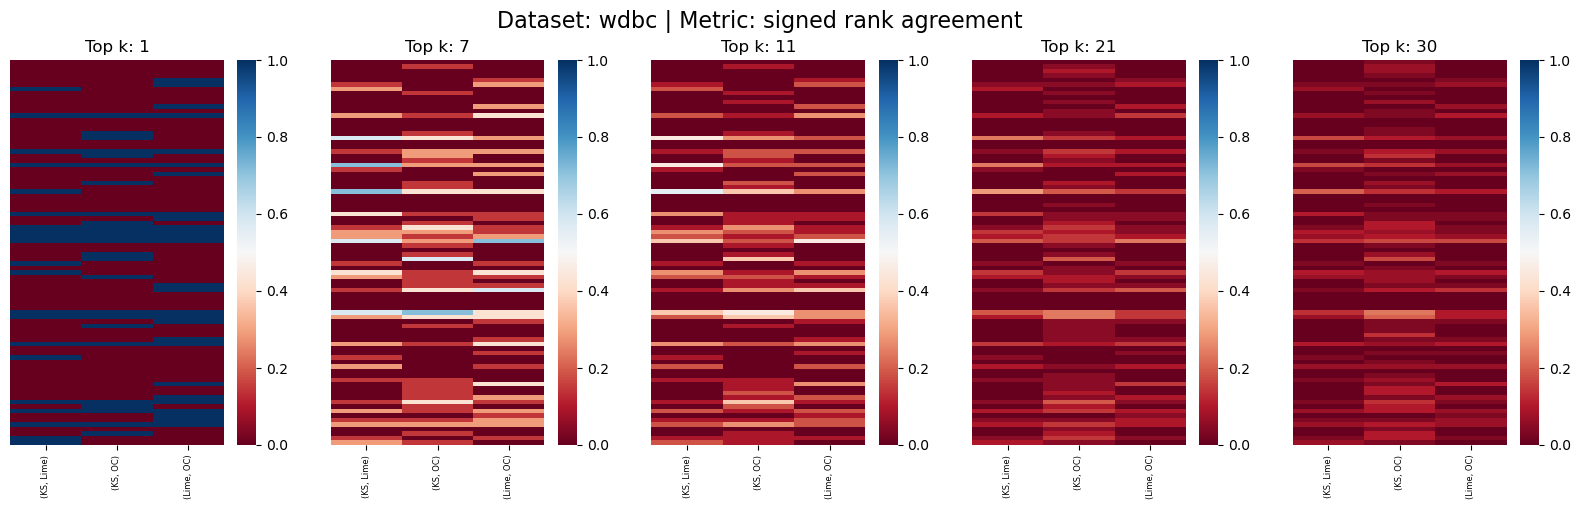

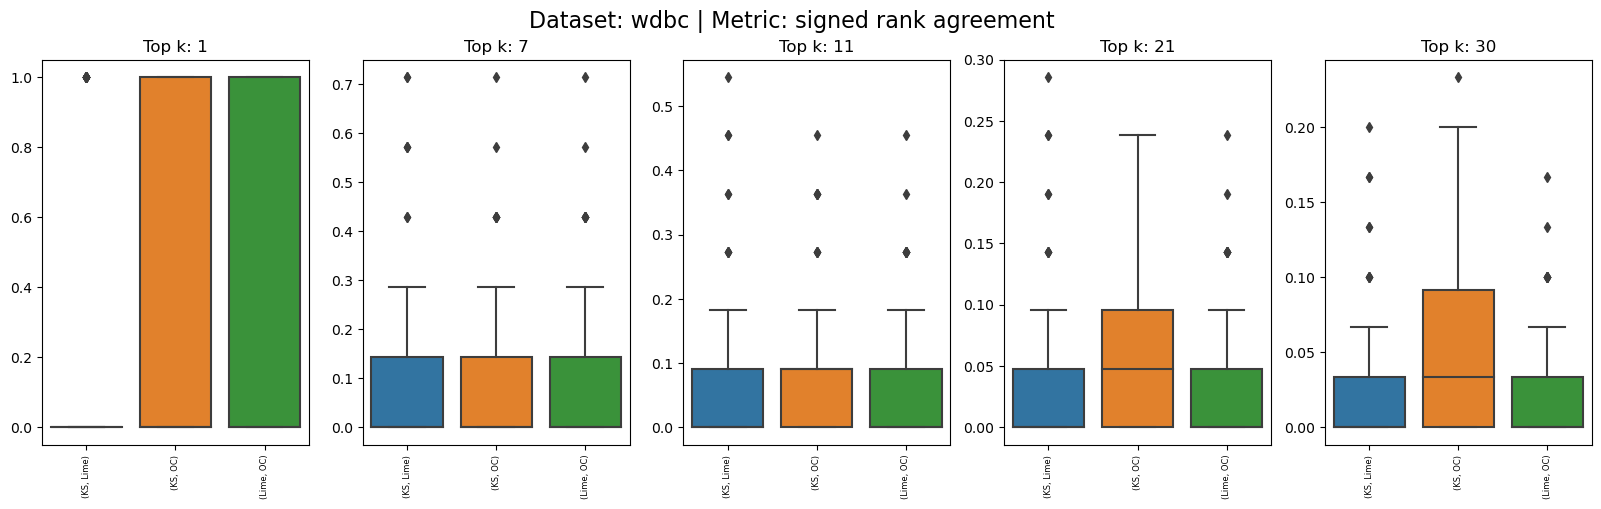

In [12]:
selected_methods = explanation_methods

dfs = {}

for metric_name, selected_metric in list_metrics.items():
    fig, axs = plt.subplots(1, 5, figsize=(20, 5))
    fig_boxplot, axs_boxplot = plt.subplots(1, 5, figsize=(20, 5))
    
    i = 0
    df_k = {}
    for selected_k in [1,7,11,21,30]:
        xticklabels = ['(KS, Lime)', '(KS, OC)', '(Lime, OC)']
        
        df = df_geral[(df_geral['metric'] == metric_name) & (df_geral['k'] == selected_k)]
        df = df[list_combinations_methods]
        
        
        df_k[selected_k] = df
        
        sns.heatmap(df, cmap='RdBu', ax=axs[i], vmax=1, vmin=0, xticklabels=xticklabels)
        axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation = 90, fontsize = 6)
        axs[i].get_yaxis().set_visible(False)
        axs[i].set_title('Top k: ' + str(selected_k))        
        
        sns.boxplot(data=df, ax=axs_boxplot[i])
        axs_boxplot[i].set_title('Top k: ' + str(selected_k))      
        axs_boxplot[i].set_xticklabels(xticklabels, rotation = 90, fontsize = 6)
        
        i+=1
    
    dfs[metric_name] = df_k
    
    fig.suptitle('Dataset: wdbc | Metric: ' + metric_name, fontsize=16)
    fig.savefig('./data/wdbc/NN/experiment_C/pertubration_based/heatmaps/' + metric_name +'_heatmap_mg_.png', dpi=300)    
    
    fig_boxplot.suptitle('Dataset: wdbc | Metric: ' + metric_name, fontsize=16)
    fig_boxplot.savefig('./data/wdbc/NN/experiment_C/pertubration_based/boxplots/' + metric_name +'_boxplot_mg_.png', dpi=300)